For organizational purposes, all the data used for training SIR models on this
Colab uses data from Feb 1st onward in CA.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from datetime import date

# Load Data

## Variants (Need to Update)

In [ ]:
# Read from now deprecated variants database
df = pd.read_csv('https://raw.githubusercontent.com/USATODAY/covid-variants/master/!combined.csv')

In [ ]:
# Parse
df.columns = ['Date', 'State', 'B.1.1.7', 'P.1', 'B.1.351', 'Total']
states = list(set(df['State'].to_list()))
states.sort()

data_per_state = {}
for state in states:
  data_per_state[state] = df[df['State'] == state]
  data_per_state[state] = data_per_state[state].reset_index(drop=True)

# CA Data
data_per_state['CA']

,Date,State,B.1.1.7,P.1,B.1.351,Total
0,2021-01-08,CA,32,0,0,32
1,2021-01-12,CA,32,0,0,32
2,2021-01-14,CA,32,0,0,32
3,2021-01-19,CA,40,0,0,40
4,2021-01-20,CA,40,0,0,40
...,...,...,...,...,...,...
89,2021-04-15,CA,1001,41,18,1060
90,2021-04-16,CA,1001,41,18,1060
91,2021-04-17,CA,1001,41,18,1060
92,2021-04-18,CA,1001,41,18,1060


## General Vaccine Number

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv')

In [ ]:
states = list(set(df['location'].to_list()))
states.sort()

vaccine_data_per_state = {}
for state in states:
  vaccine_data_per_state[state] = df[df['location'] == state]
  vaccine_data_per_state[state] = vaccine_data_per_state[state].reset_index(drop=True).dropna()

vaccine_data_per_state['California']

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
1,2021-01-13,California,891489.0,3435650.0,744545.0,0.34,2.26,133689.0,1.88,8.70,75188.00,75188.0,1903.0,0.259
3,2021-01-15,California,1072959.0,3548575.0,865387.0,0.52,2.72,204374.0,2.19,8.98,97666.00,85553.0,2165.0,0.302
7,2021-01-19,California,1460430.0,3548575.0,1195969.0,0.66,3.70,260838.0,3.03,8.98,96867.75,92018.0,2329.0,0.412
8,2021-01-20,California,1532329.0,4169450.0,1255311.0,0.69,3.88,273276.0,3.18,10.55,71899.00,91549.0,2317.0,0.368
9,2021-01-21,California,1633875.0,4379500.0,1335886.0,0.74,4.14,293834.0,3.38,11.08,101546.00,94083.0,2381.0,0.373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2021-04-29,California,29957450.0,38562350.0,19054735.0,29.86,75.82,11796688.0,48.22,97.60,317358.00,367495.0,9301.0,0.777
108,2021-04-30,California,30223491.0,38918500.0,19178415.0,30.23,76.49,11945441.0,48.54,98.50,266041.00,356625.0,9026.0,0.777
109,2021-05-01,California,30820835.0,39630080.0,19444906.0,31.08,78.00,12282199.0,49.21,100.30,597344.00,359825.0,9107.0,0.778
110,2021-05-02,California,31185031.0,39630080.0,19593097.0,31.65,78.93,12505853.0,49.59,100.30,364196.00,340912.0,8628.0,0.787


## Total Covid Cases

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
parse = list(df.columns)
parse = list(filter(lambda x: '/21' in x and '/21/20' not in x, parse))
df = df[['Province_State'] + parse]

In [ ]:
cases_per_state = {}

states = list(set(df['Province_State'].to_list()))
states.sort()

for state in states:
  data = df[df['Province_State'] == state]
  data = data.reset_index(drop=True)
  data = data[parse]

  cases_per_state[state] = pd.DataFrame(data.sum(axis=0)).reset_index()
  cases_per_state[state].columns = ['Date', 'Total_Cases']

cases_per_state['California']

,Date,Total_Cases
0,1/1/21,2365024
1,1/2/21,2415246
2,1/3/21,2452262
3,1/4/21,2490518
4,1/5/21,2529480
...,...,...
117,4/28/21,3738327
118,4/29/21,3740038
119,4/30/21,3742115
120,5/1/21,3743681


## Convert to Time Series for SIR Model

In [ ]:
# Start Date for data recording
start_date = date(2021, 2, 1)

In [ ]:
vac_t = {}

for index, row in vaccine_data_per_state['California'].iterrows():
  cur_date = row['date']
  cur_date = datetime.strptime(cur_date, "%Y-%m-%d").date()
  diff = cur_date - start_date
  vac_t[diff.days] = row['total_vaccinations']

print(vac_t)

{-19: 891489.0, -17: 1072959.0, -13: 1460430.0, -12: 1532329.0, -11: 1633875.0, -10: 1803679.0, -9: 2008220.0, -8: 2199908.0, -7: 2330633.0, -6: 2446577.0, -5: 2579666.0, -4: 2746876.0, -3: 2910562.0, -2: 3095781.0, -1: 3285351.0, 0: 3453284.0, 1: 3543817.0, 2: 3671316.0, 3: 3723803.0, 4: 3920632.0, 5: 4137600.0, 6: 4485166.0, 7: 4682862.0, 8: 4784478.0, 9: 4957297.0, 10: 5134864.0, 11: 5341104.0, 12: 5562553.0, 13: 5820388.0, 15: 6210992.0, 16: 6323011.0, 17: 6496140.0, 18: 6964603.0, 19: 7201713.0, 20: 7453468.0, 21: 7604725.0, 22: 7728120.0, 23: 7876011.0, 24: 8064121.0, 25: 8310945.0, 26: 8566470.0, 27: 8821044.0, 28: 9106077.0, 29: 9497125.0, 30: 9731169.0, 31: 9860209.0, 32: 10071476.0, 33: 10415023.0, 34: 10634752.0, 35: 10805474.0, 36: 10925581.0, 37: 11062505.0, 38: 11220508.0, 39: 11428034.0, 40: 11881857.0, 41: 11883375.0, 42: 12306608.0, 43: 12686451.0, 44: 13161027.0, 45: 13563094.0, 46: 13882984.0, 47: 14276125.0, 48: 14708175.0, 49: 15050673.0, 50: 15349039.0, 51: 156918

In [ ]:
var_t = {}

for index, row in data_per_state['CA'].iterrows():
  cur_date = row['Date']
  cur_date = datetime.strptime(cur_date, "%Y-%m-%d").date()
  diff = cur_date - start_date
  var_t[diff.days] = [max(row['B.1.1.7'], 1), max(row['P.1'], 1), max(row['B.1.351'], 1)]

print(var_t)

{-24: [32, 1, 1], -20: [32, 1, 1], -18: [32, 1, 1], -13: [40, 1, 1], -12: [40, 1, 1], -11: [40, 1, 1], -10: [72, 1, 1], -9: [72, 1, 1], -8: [72, 1, 1], -7: [90, 1, 1], -6: [90, 1, 1], -5: [92, 1, 1], -4: [92, 1, 1], -3: [113, 1, 1], -2: [113, 1, 1], -1: [113, 1, 1], 0: [113, 1, 1], 1: [127, 1, 1], 2: [127, 1, 1], 3: [145, 1, 1], 4: [145, 1, 1], 5: [145, 1, 1], 6: [150, 1, 1], 7: [150, 1, 1], 8: [156, 1, 1], 9: [156, 1, 1], 10: [159, 1, 2], 11: [159, 1, 2], 12: [159, 1, 2], 13: [186, 1, 2], 14: [186, 1, 2], 15: [186, 1, 2], 16: [186, 1, 2], 17: [195, 1, 2], 18: [195, 1, 2], 19: [195, 1, 2], 20: [195, 1, 2], 21: [195, 1, 2], 22: [204, 1, 2], 23: [204, 1, 2], 24: [204, 1, 2], 25: [204, 1, 2], 26: [204, 1, 2], 27: [206, 1, 3], 28: [206, 1, 3], 29: [212, 1, 3], 30: [212, 1, 3], 31: [250, 1, 3], 32: [250, 1, 3], 33: [250, 1, 3], 34: [262, 1, 3], 35: [262, 1, 3], 36: [262, 1, 3], 37: [262, 1, 3], 38: [262, 1, 3], 39: [262, 1, 3], 40: [262, 1, 3], 41: [343, 1, 3], 42: [343, 1, 3], 43: [375, 1,

In [ ]:
cases_t = {}

for index, row in cases_per_state['California'].iterrows():
  cur_date = row['Date']
  cur_date = datetime.strptime(cur_date, '%m/%d/%y').date()
  diff = cur_date - start_date
  cases_t[diff.days] = row['Total_Cases']

print(cases_t)

{-31: 2365024, -30: 2415246, -29: 2452262, -28: 2490518, -27: 2529480, -26: 2567843, -25: 2609088, -24: 2653925, -23: 2704483, -22: 2744008, -21: 2784716, -20: 2832085, -19: 2870104, -18: 2910044, -17: 2948054, -16: 2983149, -15: 3014428, -14: 3043005, -13: 3078551, -12: 3097632, -11: 3122705, -10: 3147207, -9: 3168028, -8: 3187475, -7: 3213222, -6: 3235045, -5: 3251292, -4: 3273905, -3: 3293531, -2: 3310949, -1: 3324264, 0: 3342647, 1: 3355781, 2: 3368281, 3: 3382932, 4: 3399745, 5: 3408241, 6: 3417982, 7: 3432088, 8: 3442672, 9: 3451176, 10: 3461753, 11: 3471311, 12: 3480228, 13: 3485841, 14: 3491392, 15: 3499871, 16: 3506402, 17: 3512396, 18: 3521225, 19: 3527338, 20: 3531846, 21: 3536946, 22: 3543340, 23: 3549090, 24: 3554629, 25: 3559682, 26: 3564094, 27: 3567582, 28: 3573549, 29: 3577966, 30: 3582320, 31: 3587567, 32: 3592560, 33: 3596760, 34: 3599311, 35: 3602445, 36: 3607891, 37: 3611295, 38: 3614852, 39: 3618976, 40: 3620890, 41: 3623063, 42: 3626027, 43: 3628300, 44: 3631572,

In [ ]:
case_c_t = []

for v in var_t:
  if v < 0:
    continue
  cases = cases_t[v]
  case_c_t.append([v] + var_t[v] + [cases - sum(var_t[v])])

print(case_c_t)

[[0, 113, 1, 1, 3342532], [1, 127, 1, 1, 3355652], [2, 127, 1, 1, 3368152], [3, 145, 1, 1, 3382785], [4, 145, 1, 1, 3399598], [5, 145, 1, 1, 3408094], [6, 150, 1, 1, 3417830], [7, 150, 1, 1, 3431936], [8, 156, 1, 1, 3442514], [9, 156, 1, 1, 3451018], [10, 159, 1, 2, 3461591], [11, 159, 1, 2, 3471149], [12, 159, 1, 2, 3480066], [13, 186, 1, 2, 3485652], [14, 186, 1, 2, 3491203], [15, 186, 1, 2, 3499682], [16, 186, 1, 2, 3506213], [17, 195, 1, 2, 3512198], [18, 195, 1, 2, 3521027], [19, 195, 1, 2, 3527140], [20, 195, 1, 2, 3531648], [21, 195, 1, 2, 3536748], [22, 204, 1, 2, 3543133], [23, 204, 1, 2, 3548883], [24, 204, 1, 2, 3554422], [25, 204, 1, 2, 3559475], [26, 204, 1, 2, 3563887], [27, 206, 1, 3, 3567372], [28, 206, 1, 3, 3573339], [29, 212, 1, 3, 3577750], [30, 212, 1, 3, 3582104], [31, 250, 1, 3, 3587313], [32, 250, 1, 3, 3592306], [33, 250, 1, 3, 3596506], [34, 262, 1, 3, 3599045], [35, 262, 1, 3, 3602179], [36, 262, 1, 3, 3607625], [37, 262, 1, 3, 3611029], [38, 262, 1, 3, 36145

## Curve Fit Vaccinations

Here we fit the cumulative vaccination curve to a logistic curve that allows
us to estimate the transfer in between susceptible and vaccinated nodes without needing an extra parameter.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]


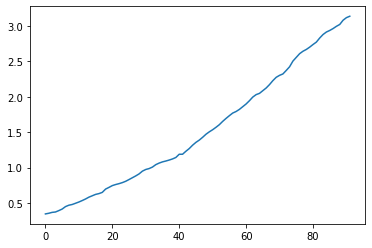

In [ ]:
x = list(filter(lambda x: x >= 0, [v for v in vac_t]))
print(x)
y = [vac_t[v] / 1e7 for v in x]
plt.plot(x, y)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


[6.52602116e+01 4.14397844e-02 1.68664061e-01]


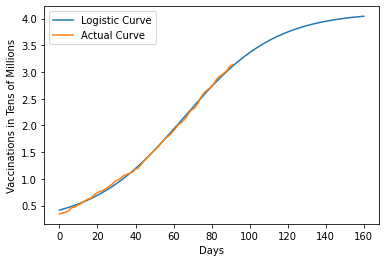

0.41645512373515703

In [ ]:
from scipy.optimize import curve_fit

n = 3.951

def logifunc(x, x0, k, off):
  return n / (1 + np.exp(-k*(x-x0))) + off

fit = curve_fit(logifunc, x, y, p0=[10, 10, 1.2e7])
print(fit[0])

xs = np.linspace(0, 160, 400)
ys = [logifunc(x, fit[0][0], fit[0][1], fit[0][2]) for x in xs]
plt.plot(xs, ys)
plt.plot(x, y)
plt.legend(['Logistic Curve', 'Actual Curve'])
plt.ylabel('Vaccinations in Tens of Millions')
plt.xlabel('Days')
plt.show()

vac_fit = fit[0]
logifunc(0, vac_fit[0], vac_fit[1], vac_fit[2])

In [ ]:
def vaccine_curve(t):
  return 1e7 * logifunc(t, vac_fit[0], vac_fit[1], vac_fit[2])

def num_vac_slope(t, delta=1):
  return (vaccine_curve(t + delta) - vaccine_curve(t)) / (delta)

print(num_vac_slope(0))

98006.08248357382


In [ ]:
from scipy.integrate import odeint

## Initial Conditons

Set initial conditions for the differential equations

In [ ]:
N = 3.951e7

# Difference with total cases "num" days before to get number of infected
num = 10
closest_var_value_before = var_t.get(-num, var_t[min(var_t.keys(), key=lambda k: abs(k-num))])
closest_var_value_cur = var_t.get(0, var_t[min(var_t.keys(), key=lambda k: abs(k))])
cur_vars = []
for i in range(len(closest_var_value_cur)):
  cur_vars.append(closest_var_value_cur[i] - closest_var_value_before[i])

# At least one case needs to be out there or else model will never predict any
IB17_0 = max(cur_vars[0], 1)
IP_0 = max(cur_vars[1], 1)
IB135_0 = max(cur_vars[2], 1)
print("Variants")
print(IB17_0, IP_0, IB135_0)

# Recovered from each variant must then be the rest
print("Recovered Variants")
RB17_0 = closest_var_value_before[0]
RP_0 = closest_var_value_before[1]
RB135_0 = closest_var_value_before[2]
print(RB17_0, RP_0, RB135_0)

# Get generic variants by subtracting out special variants from total cases
IN_0 = cases_t[0] - cases_t[-num]
IN_0 -= IB17_0 + IP_0 + IB135_0
print("Generic")
print(IN_0)

# Recovered must then be all cases from 7 days ago (assuming 7 days to recover)
# Subtract variants recoveries
RN_0 = cases_t[-num] - RB17_0 - RP_0 - RB135_0
print("Recovered")
print(RN_0)

# Get number of people already vaccinated
V_0 = vac_t[0]
print("Vaccinated")
print(V_0)

# Susceptible is then the remaining of the population
S_0 = N - V_0 - RN_0 - RB17_0 - RP_0 - RB135_0 - IN_0 - IB17_0 - IP_0 - IB135_0
print("Susceptible")
print(S_0)

Variants
41 1 1
Recovered Variants
72 1 1
Generic
195397
Recovered
3147133
Vaccinated
3453284.0
Susceptible
32714069.0


## Sanity Check

In [ ]:
# Define the derivatives for the differential equation
def deriv(y, t, b, g):
  S, I, R = y
  dSdt = -(b * I * S / N)
  dINdt = (b * I * S / N) - g * I
  dRNdt = g * I
  return dSdt, dINdt, dRNdt

[0.07705771 0.09472291]


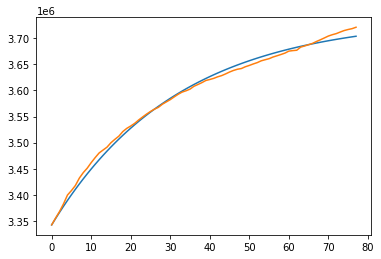

In [ ]:
# Function to predict the cumulative number of Covid cases
def predict_curve(t, b, g):
  ret = odeint(deriv, y0, t, args=(b, g))
  S, I, R = ret.T
  return I + R

# Set initial conditions
y0 = S_0, IN_0, RN_0

# Get expected x and y values (day and number of cases)
expected_x = list(filter(lambda x: x >= 0, [v for v in var_t]))
expected_v_y = [sum(var_t[v]) for v in expected_x]
expected_n_y = [cases_t[v] for v in expected_x]

# Find the curve that best fits the expected_x and expected_n_y
fit = curve_fit(predict_curve, expected_x, expected_n_y, bounds=(0, 1))
print(fit[0])

# Get and plot results
ret = odeint(deriv, y0, expected_x, args=tuple(fit[0]))
S, I, R = ret.T

plt.plot(expected_x, I + R)
plt.plot(expected_x, expected_n_y)
plt.show()

# SIR General Variants (2 I's)

1.   S (Susceptible)
2.   V (Vaccinated)
3.   IN (Infected, Normal)
4.   IV (Infected, Variant)
5.   RN (Recovered, Normal)
6.   RV (Recovered, Variant)





Let V_f be the fitted curve for vaccination. The differential equations are:

1.   dS/dt = -dV_f(t)/dt - b1 * IN * S / N - b2 * IV * S / N
2.   dV/dt = dV_f(t)/dt - m1 * IN * V / N - m2 * IV * V / N
3.   dIN/dt = b1 * IN * S / N + m1 * IN * V / N - g * IN
4.   dIV/dt = b2 * IN * S / N + m2 * IN * V / N - g * IV
5.   dRN/dt = g * IN
6.   dRV/dt = g * IV

Assuming b's and g's are the same for IV and IN to R. Manually set g.

In [ ]:
IV_0 = IB17_0 + IP_0 + IB135_0
print(IV_0)

RV_0 = RB17_0 + RP_0 + RB135_0
print(RV_0)

43
74


In [ ]:
# Define gamma as the expected number of days until recovery
g = 1/num

# Define differential equations
def deriv(y, t, b1, b2, m1, m2):
  S, V, IN, IV, RN, RV = y
  dSdt = -num_vac_slope(t) - (b1 * IN * S / N) - (b2 * IV * S / N)
  dVdt = num_vac_slope(t) - (m1 * IN * V / N) - (m2 * IV * V / N)
  dINdt = (b1 * IN * S / N) + (m1 * IN * V / N) - g * IN
  dIVdt = (b2 * IV * S / N) + (m2 * IV * V / N) - g * IV
  dRNdt = g * IN
  dRVdt = g * IV
  return dSdt, dVdt, dINdt, dIVdt, dRNdt, dRVdt

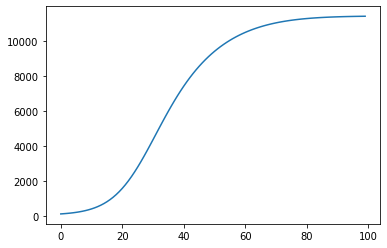

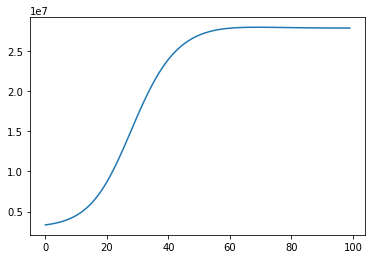

In [ ]:
# Test

ts = np.linspace(0, 100, 100)

y0 = S_0, V_0, IN_0, IV_0, RN_0, RV_0

b1 = 0.3
b2 = 0.3
m1 = 0.1
m2 = 0.2

ret = odeint(deriv, y0, ts, args=(b1, b2, m1, m2))
S, V, IN, IV, RN, RV = ret.T
plt.plot(IV + RV)
plt.show()

plt.plot(IN + RN)
plt.show()

[0.06795159 0.14024578 0.09594703 0.04855853]


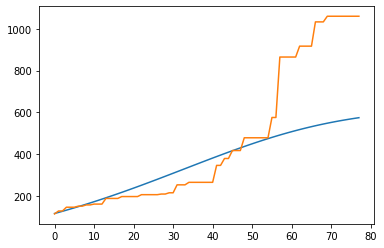

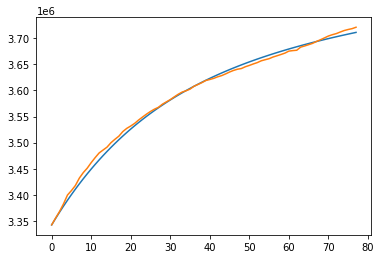

In [ ]:
# Predict curve (can predict either variant or normal curve)
def predict_var_t_curve(t, b1, b2, m1, m2):
  ret = odeint(deriv, y0, t, args=(b1, b2, m1, m2))
  S, V, IN, IV, RN, RV = ret.T
  return IN + RN

# Get actual data points
expected_x = list(filter(lambda x: x >= 0, [v for v in var_t]))
expected_v_y = [sum(var_t[v]) for v in expected_x]
expected_n_y = [cases_t[v] for v in expected_x]


# Find best parameters that match either variant or normal curve
fit = curve_fit(predict_var_t_curve, expected_x, expected_n_y, bounds=(0, 1))
print(fit[0])

# Get and plot result
ret = odeint(deriv, y0, expected_x, args=tuple(fit[0]))
S, V, IN, IV, RN, RV = ret.T
plt.plot(expected_x, IV + RV)
plt.plot(expected_x, expected_v_y)
plt.show()

plt.plot(expected_x, IN + RN)
plt.plot(expected_x, expected_n_y)
plt.show()

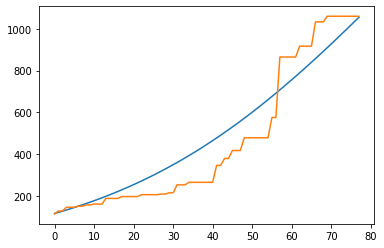

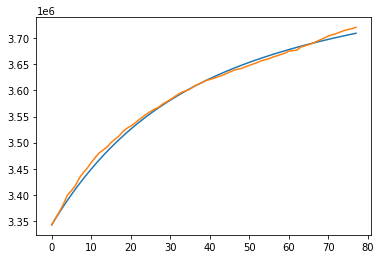

In [ ]:
# Test

ret = odeint(deriv, y0, expected_x, args=tuple([0.06799324, 0.140, 0.09521198, 0.11]))
S, V, IN, IV, RN, RV = ret.T
plt.plot(expected_x, IV + RV)
plt.plot(expected_x, expected_v_y)
plt.show()

plt.plot(expected_x, IN + RN)
plt.plot(expected_x, expected_n_y)
plt.show()

# SIR General Variants (Fixed Transmission)

In [ ]:
# Define gamma as 1/(expected days to recover)
g = 1/num

# How much more infective the variants are
t_factor = 1.3
# Use roughly the same normal infection parameter as the result from above
b = 0.07

def deriv(y, t, m1, m2):
  S, V, IN, IV, RN, RV = y
  dSdt = -num_vac_slope(t) - (b * IN * S / N) - (t_factor * b * IV * S / N)
  dVdt = num_vac_slope(t) - (m1 * IN * V / N) - (m2 * IV * V / N)
  dINdt = (b * IN * S / N) + (m1 * IN * V / N) - g * IN
  dIVdt = (t_factor * b * IV * S / N) + (m2 * IV * V / N) - g * IV
  dRNdt = g * IN
  dRVdt = g * IV
  return dSdt, dVdt, dINdt, dIVdt, dRNdt, dRVdt

In [ ]:
def predict_var_t_curve(t, m1, m2):
  ret = odeint(deriv, y0, t, args=(m1, m2))
  S, V, IN, IV, RN, RV = ret.T
  return IV + RV

expected_x = list(filter(lambda x: x >= 0, [v for v in var_t]))
expected_v_y = [sum(var_t[v]) for v in expected_x]

expected_n_y = [cases_t[v] for v in expected_x]

fit = curve_fit(predict_var_t_curve, expected_x, expected_v_y)
print(fit[0])

ret = odeint(deriv, y0, expected_x, args=tuple(fit[0]))
S, V, IN, IV, RN, RV = ret.T
plt.plot(expected_x, IV + RV)
plt.plot(expected_x, expected_v_y)
plt.show()

plt.plot(expected_x, IN + RN)
plt.plot(expected_x, expected_n_y)
plt.show()

# SIR General Variants With Custom Error Function

In [ ]:
g = 1/num

# How much more infective variants are
t_factor = 1.3

# Use roughly the same normal infection parameter as the result from above
b = 0.07

def deriv(y, t, m1, m2):
  S, V, IN, IV, RN, RV = y
  dSdt = -num_vac_slope(t) - (b * IN * S / N) - (t_factor * b * IV * S / N)
  dVdt = num_vac_slope(t) - (m1 * IN * V / N) - (m2 * IV * V / N)
  dINdt = (b * IN * S / N) + (m1 * IN * V / N) - g * IN
  dIVdt = (t_factor * b * IV * S / N) + (m2 * IV * V / N) - g * IV
  dRNdt = g * IN
  dRVdt = g * IV
  return dSdt, dVdt, dINdt, dIVdt, dRNdt, dRVdt

In [ ]:
expected_x = list(filter(lambda x: x >= 0, [v for v in var_t]))
expected_v_y = [sum(var_t[v]) for v in expected_x]
expected_n_y = [cases_t[v] for v in expected_x]

# Training data
train_size = 0.8
train_x = expected_x[: int(np.floor(len(expected_x) * train_size))]
train_v_y = expected_v_y[: int(np.floor(len(expected_x) * train_size))]
train_n_y = expected_n_y[: int(np.floor(len(expected_x) * train_size))]

y0 = S_0, V_0, IN_0, IV_0, RN_0, RV_0

# Custom error function
# Minimize squared difference between the curves
def error(vs):
  m1, m2 = vs
  ret = odeint(deriv, y0, train_x, args=(m1, m2))
  S, V, IN, IV, RN, RV = ret.T
  vars = IV + RV
  norms = IN + RN
  frac_diff_v = ((vars - train_v_y) / train_v_y) ** 2
  frac_diff_n = ((norms - train_n_y) / train_n_y) ** 2
  return sum(frac_diff_v + frac_diff_n)

print(error([0.51737301, 0.35133384]))
print(error([0.1, 0.27167919]))

51.238429927693986
0.9861389427681091


[0.07756646 0.26475141]


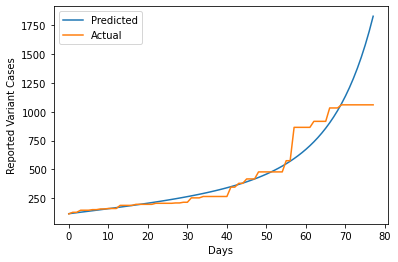

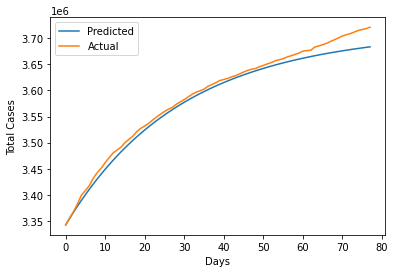

In [ ]:
from scipy.optimize import minimize

# Find the parametrs that minimize overal squared error
res = minimize(error, [0.1, 0.2], bounds=[(0, 1), (0, 1)])

ret = odeint(deriv, y0, expected_x, args=tuple(res.x))
print(res.x)
S, V, IN, IV, RN, RV = ret.T
plt.plot(expected_x, IV + RV)
plt.plot(expected_x, expected_v_y)
plt.xlabel("Days")
plt.ylabel("Reported Variant Cases")
plt.legend(("Predicted", "Actual"))
plt.show()

plt.plot(expected_x, IN + RN)
plt.plot(expected_x, expected_n_y)
plt.xlabel("Days")
plt.ylabel("Total Cases")
plt.legend(("Predicted", "Actual"))
plt.show()